In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object for each categorical feature
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])


In [ ]:
X = df.drop("Hypertension", axis=1)  # Features
y = df["KidneyFailure"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

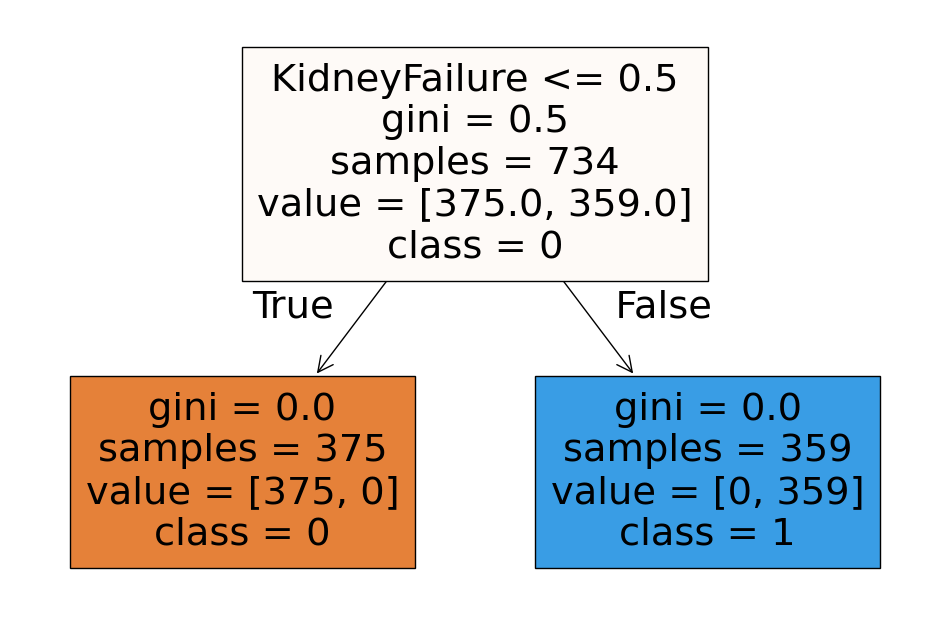

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert model.classes_ to strings if they are not already
class_names = [str(c) for c in model.classes_]

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names) # Use the converted class names
plt.show()